**TITANIC Overview**

The **RMS Titanic**, was a luxury British steamship that sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.

In this challenge, we target to complete the analysis of what sorts of people were likely to survive.

### Our main aim is to predict whether a particular person survived the voyage or not??

### Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(12, 10)})

### Loading Dataset

In [67]:
data = pd.read_csv(r"E:train.csv")

In [68]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Types of Features :** 
- **Categorical**  - Sex, and Embarked.
- **Continuous**  - Age, Fare
- **Discrete**     - SibSp, Parch.
- **Alphanumeric** - Cabin (alphabets and numeric both like NAN and C85)

In [69]:
data.info() #age and cabin ar showing the less values, that means there are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [70]:
data.isnull().sum() #to count the number of null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
#describe column gives all the informaiton about numerical columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <font color = 'green'>Numerical Value Analysis</font>

We have to find out how many people survived.

So, Survived column is an out put and rest other are input parameters.

In a heatmap, let us take all the parameters to find out the correlation between all the parameters.

1) As we can see below heatmap, the fairer the color, the more it is related.
The more darker, less the correlation.

2) Observing the Survived column with other parameters like 
* Survived with survived is fairer, and value is 1
* Survived with Sipsp(-0.035) and with age is (-0.077) is negatively correlated whereas survived with Fare is (0.26) is more fairer then the parch column.
* Fare is also highly correlated with survived column.

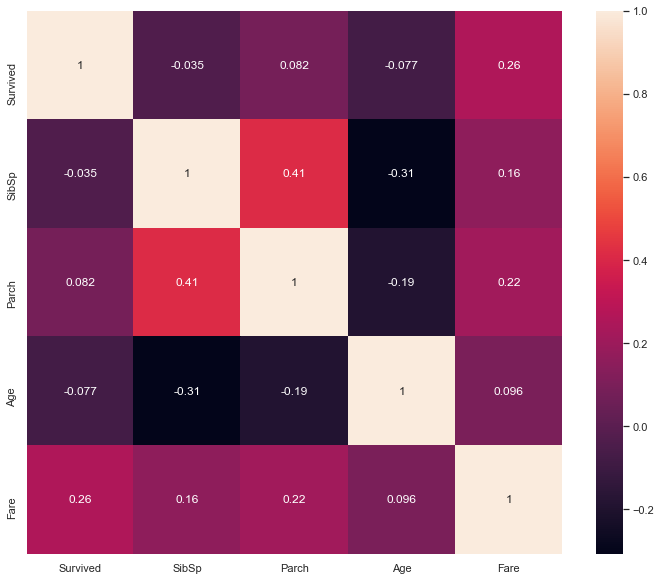

In [72]:
#annot = True gives the decimal values

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(data[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True)

**Conclusion : **

Only Fare feature seems to have a significative correlation with the survival probability.

It doesn't mean that the other features are not usefull. Subpopulations in these features can be correlated with the survival. To determine this, we need to explore in detail these features

## <font color = "green">sibsp - Number of siblings / spouses aboard the Titanic </font>

In [73]:
data['SibSp'].nunique() #number of unique values

7

In [74]:
data['SibSp'].unique() #the below listed are unique values(0,1,2,3,4,5,8)

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


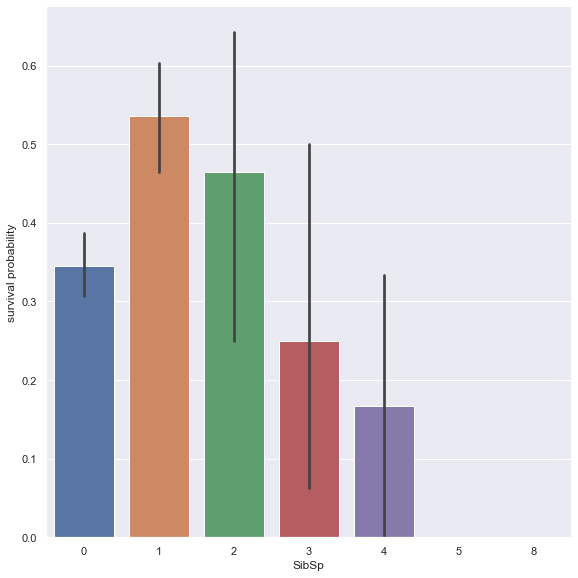

In [75]:
bargraph_sibsp = sns.factorplot(x = "SibSp", y = "Survived", data = data, kind = "bar", size = 8)
bargraph_sibsp = bargraph_sibsp.set_ylabels("survival probability")

It seems that passengers having a lot of siblings/spouses have less chance to survive.
<br />
Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

As the number of siblings increases, the chances to survive decreases.

## <font color = "green"> Age </font>

c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


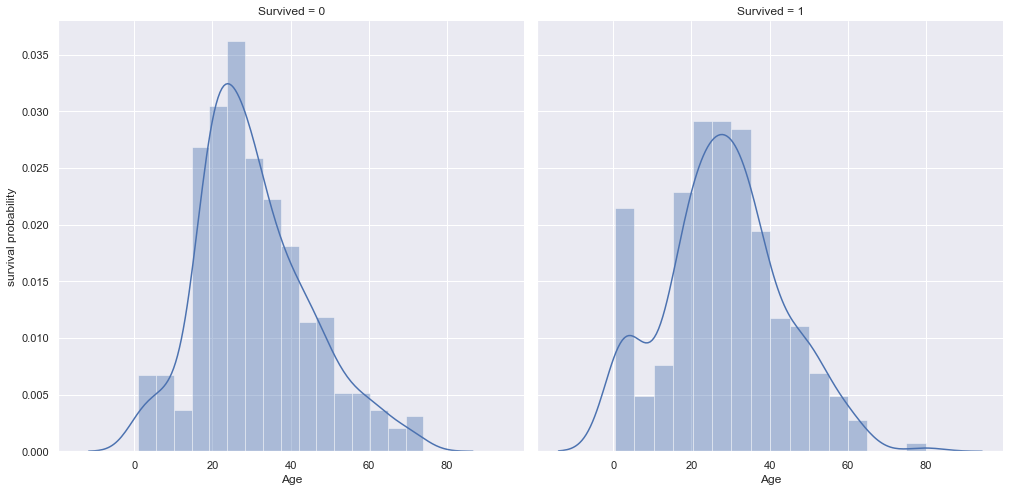

In [76]:
# usinf facetgrid and distribution plot we can visualise 
# the graph between survived and age column
# survived = 0, means not survived
# survived = 1, means survived

age_visual = sns.FacetGrid(data, col = 'Survived', size=7)
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("survival probability")


Age distribution seems to be a tailed distribution, maybe a gaussian distribution.

We notice that age distributions are not the same in the survived and not survived subpopulations. Indeed, there is a peak corresponding to young passengers, that have survived. We also see that passengers between 60-80 have less survived. 

So, even if "Age" is not correlated with "Survived", we can see that there is age categories of passengers that of have more or less chance to survive.

It seems that very young passengers have more chance to survive.


## <font color = "green">Sex</font>

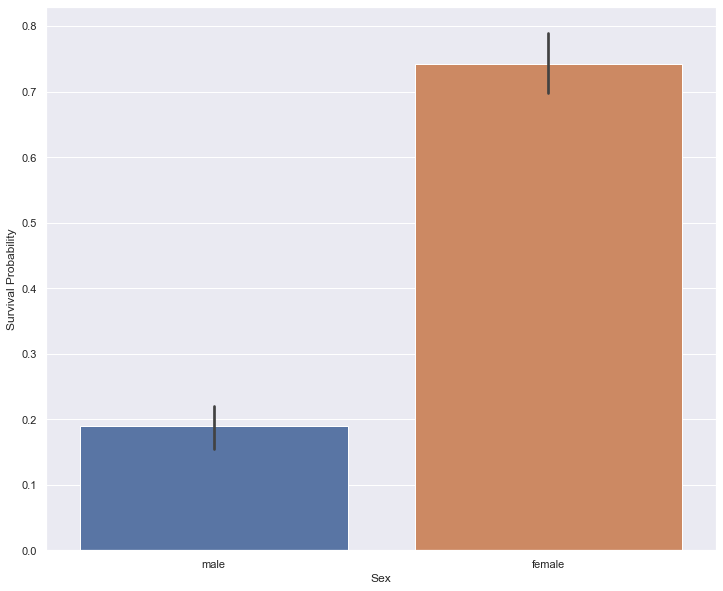

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
age_plot = sns.barplot(x = "Sex",y = "Survived", data = data)
age_plot = age_plot.set_ylabel("Survival Probability")

In [78]:
data[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival.

## <font color = "green">PClass</font>

c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


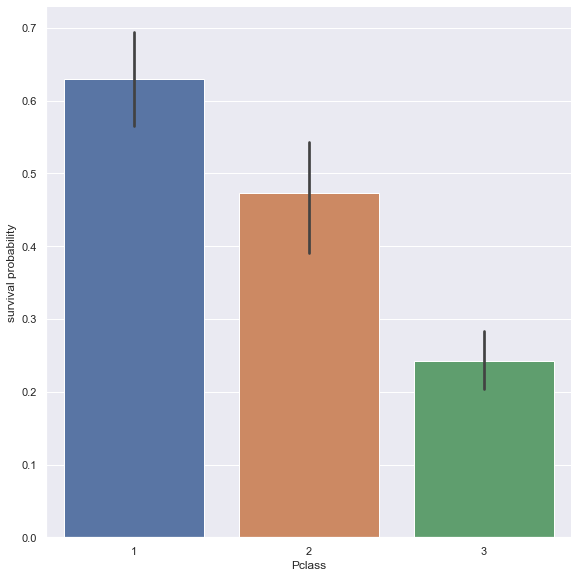

In [79]:
pclass = sns.factorplot(x = "Pclass", y = "Survived", data = data, kind = "bar", size = 8)
pclass = pclass.set_ylabels("survival probability")

People from the first class has more chance of survival than the passenger from the second class.

Similarly, passenger form second class has more chance of survival than the passenger from the third class.

## <font color = "green">Pclass vs Survived by Sex</font>

The effect of the passenger class with respect to the survival probality taking sex as a consideration.  

c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


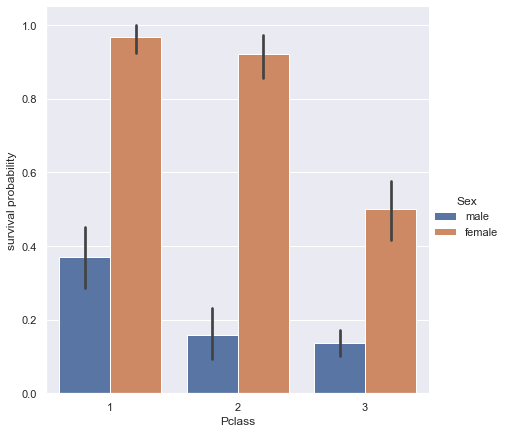

In [80]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=data, size=6, kind="bar")
g = g.set_ylabels("survival probability")

As we can see, the survival is depend on the type of class we have.

* Passenger class 1 has more survival compared to 3.

* But when we take single class, female have a very high percentage of survival compared to the male passengers.

* In totality, passenger of class 1 has high percentage of survival compared to other class.

* Female from high class (class 1) having high percentage of survival even over rest of the classes and males irrespective of the class.

## <font color = "green">Embarked </font>

In [81]:
data["Embarked"].isnull().sum() #we only have 2 null values

2

In [82]:
data["Embarked"].value_counts() #we can see 3 embarkment S,C and Q with S as highest number

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [83]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


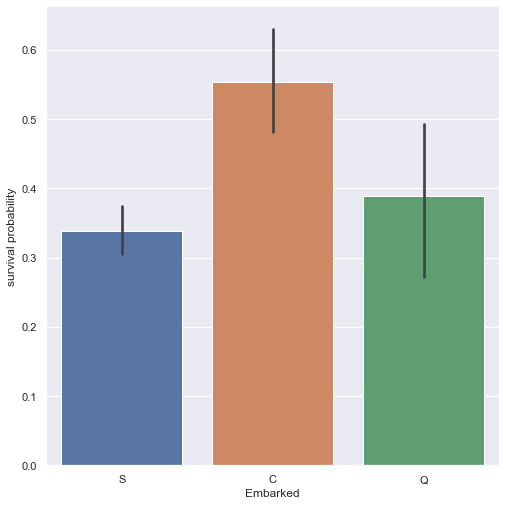

In [84]:
g = sns.factorplot(x="Embarked", y="Survived", data=data, size=7, kind="bar")
g = g.set_ylabels("survival probability")

Passenger coming from Cherbourg (C) have more chance to survive.

### Let's find the reason

c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\veena\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


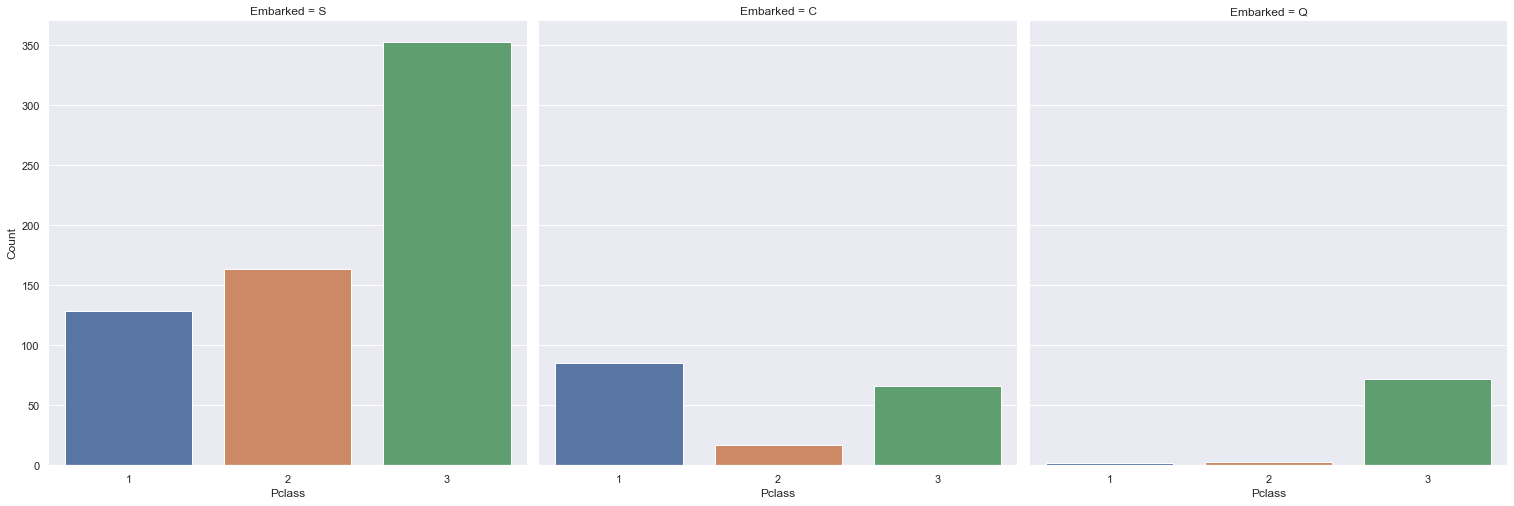

In [85]:
# Explore Pclass vs Embarked 
g = sns.factorplot("Pclass", col="Embarked",  data=data, size=7, kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")

* We can clerly visualise from the graph that passenger which are embarked from station S, majority of them belongs to class 3 so, the chance of survival is less.

* passengers belongs to class 1 is higher embarkement from station C

* The number of passengers embarked from station Q is higher from class 3 again.

So, class 3 people is highest that embarked from station S and Q whereas class 1 people is higher in embarked C 

Cherbourg passengers are mostly in first class which have the highest survival rate.
<br/>
Southampton (S) and Queenstown (Q) passangers are mostly in third class.

# <font color = "green">Preparing data</font>

In [86]:
data = pd.read_csv(r"titanic data.csv")

In [87]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [89]:
mean = data["Age"].mean()
mean

29.69911764705882

In [90]:
std = data["Age"].std()
std

14.526497332334042

In [91]:
is_null = data["Age"].isnull().sum()
is_null

177

Let us find the random values between the range (means +- Standard deviation)

Because we want our parameters to be having the same distribution as it should be.

To maintain the distribution, we have to fit the random numbers in place of null values with the range of (means +- Standard deviation) for the total NULL values of 177. So wont be hampering the distribution and resolving the issues of null values.

##### Filling missing values of Age with the random numbers generated between (mean - std) and ( mean + std)

In [92]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
    
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice

In [93]:
data["Age"].isnull().sum()

0

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [95]:
data["Embarked"].isnull().sum()

2

##### Filling null values of embarked with most frequent values that is S

In [96]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

##### Dropping the columns like Passenger id, cabin, ticket and name as it will not provide any information

In [97]:
col_to_drop = ['PassengerId','Cabin', 'Ticket','Name']
data.drop(col_to_drop, axis=1, inplace = True)

In [98]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##### Converting clumn Sex categorical values to numerical values

In [99]:
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [100]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


##### Converting the column Embarked categorical value to numerical value

In [101]:
ports = {"S": 0, "C": 1, "Q": 2}

data['Embarked'] = data['Embarked'].map(ports)

In [102]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## <font color = "green">Splitting data</font>

In [104]:
# input and output data

x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [105]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [106]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [107]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

## <font color = "green">Feature Scaling</font>

We have to feature scale our data, because our data is in different ranges and so that our data dont go biased. 

In [108]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

## <font color = "green"> Classification</font>

In [109]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [110]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [111]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [112]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [113]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  80.6
Support Vector      :  81.72
Decision Tree       :  77.61
K-NN Classifier     :  80.22
Random Forest       :  81.72
